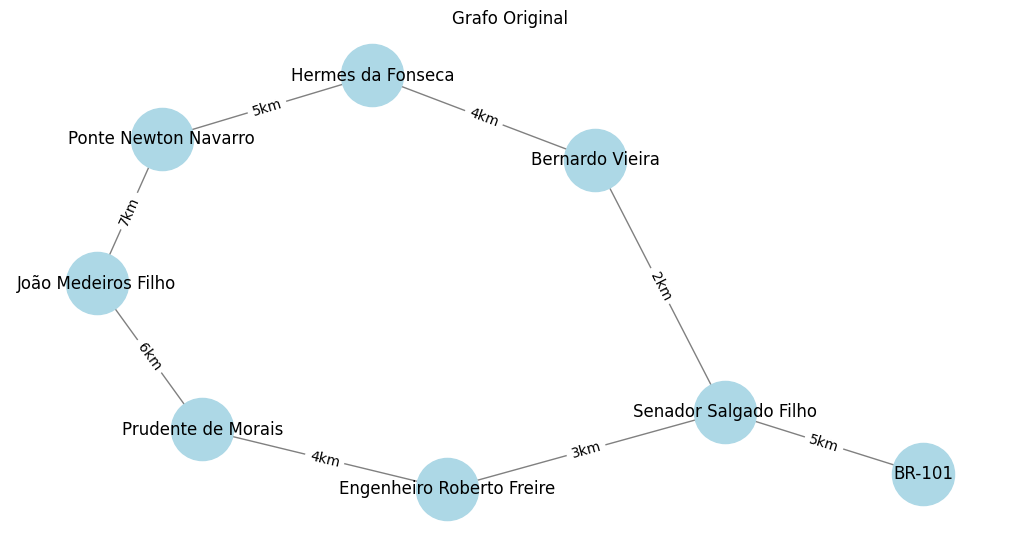

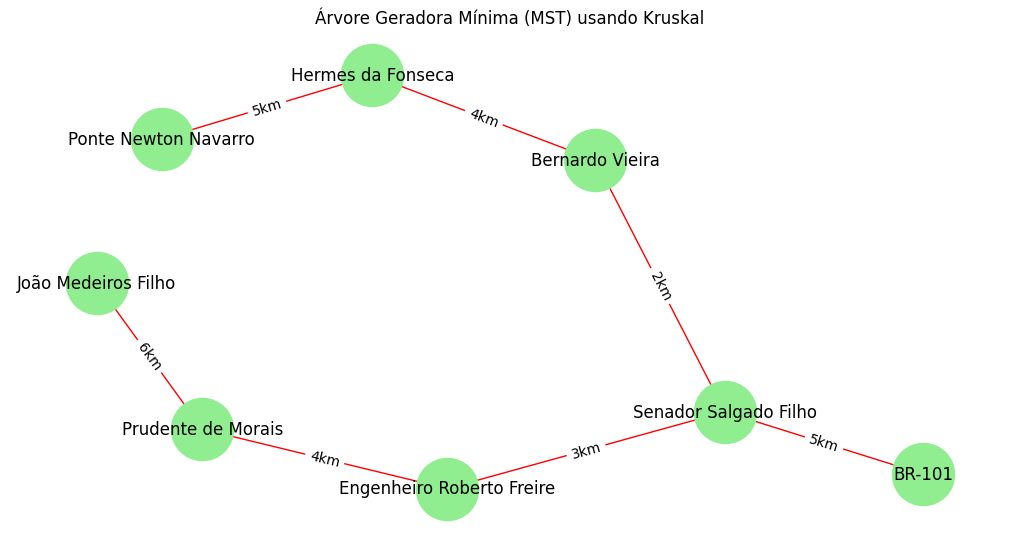

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Definindo os pontos de interesse e suas conexões (vias e interseções importantes de Natal-RN)
pontos_interesse = [
    "BR-101", "Senador Salgado Filho", "Engenheiro Roberto Freire",
    "Prudente de Morais", "João Medeiros Filho", "Ponte Newton Navarro",
    "Hermes da Fonseca", "Bernardo Vieira"
]

# Definindo as arestas e pesos (distâncias aproximadas entre os pontos em km)
arestas = [
    ("BR-101", "Senador Salgado Filho", 5),
    ("Senador Salgado Filho", "Engenheiro Roberto Freire", 3),
    ("Engenheiro Roberto Freire", "Prudente de Morais", 4),
    ("Prudente de Morais", "João Medeiros Filho", 6),
    ("João Medeiros Filho", "Ponte Newton Navarro", 7),
    ("Ponte Newton Navarro", "Hermes da Fonseca", 5),
    ("Hermes da Fonseca", "Bernardo Vieira", 4),
    ("Bernardo Vieira", "Senador Salgado Filho", 2)
]

# Criando o grafo
G = nx.Graph()
G.add_weighted_edges_from(arestas)

# Calculando a Árvore Geradora Mínima usando o algoritmo de Kruskal
mst = nx.minimum_spanning_tree(G, algorithm='kruskal')

# Plotando o grafo original
plt.figure(figsize=(10, 5))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d}km' for u, v, d in arestas})
plt.title("Grafo Original")
plt.show()

# Plotando a MST
plt.figure(figsize=(10, 5))
nx.draw(mst, pos, with_labels=True, node_color='lightgreen', edge_color='red', node_size=2000, font_size=12)
nx.draw_networkx_edge_labels(mst, pos, edge_labels={(u, v): f'{d}km' for u, v, d in mst.edges.data('weight')})
plt.title("Árvore Geradora Mínima (MST) usando Kruskal")
plt.show()


Comprimento total do MST: 17172.896499490507 metros


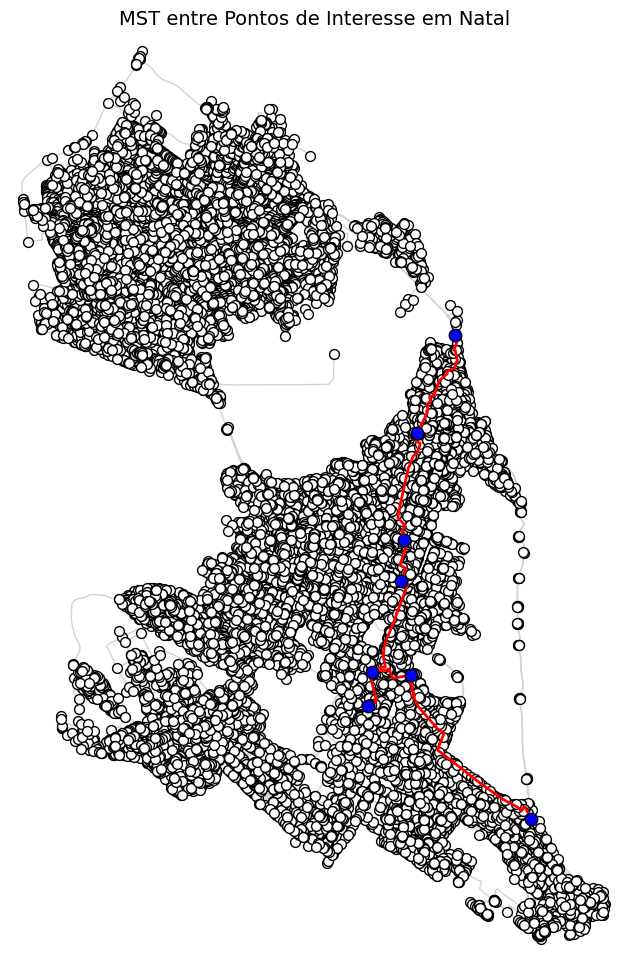

In [10]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# ============================================
# 1. Configurar pontos de interesse
# ============================================
pontos_interesse = {
    "BR-101": (-5.844409, -35.215984),
    "Senador Salgado Filho": (-5.817583, -35.208484),
    "Engenheiro Roberto Freire": (-5.868700, -35.179288),
    "Prudente de Morais": (-5.837101, -35.215086),
    "João Medeiros Filho": (-5.785983, -35.205241),
    "Ponte Newton Navarro": (-5.763212, -35.198965),
    "Hermes da Fonseca": (-5.837541, -35.206730),
    "Bernardo Vieira": (-5.809407, -35.208136),
}

latitudes = [p[0] for p in pontos_interesse.values()]
longitudes = [p[1] for p in pontos_interesse.values()]

# ============================================
# 2. Obter o grafo da cidade
# ============================================
place = "Natal, Rio Grande do Norte, Brazil"
G = ox.graph_from_place(place, network_type='drive')

# Converter para grafo não-direcionado
G_undirected = G.to_undirected()

# ============================================
# 3. Encontrar nós mais próximos dos pontos de interesse
# ============================================
poi_nodes = ox.distance.nearest_nodes(G_undirected, X=longitudes, Y=latitudes)
poi_nodes = list(set(poi_nodes))

# ============================================
# 4. Construir grafo completo com menor rota entre POIs
# ============================================
G_interest = nx.Graph()
for i in range(len(poi_nodes)):
    for j in range(i + 1, len(poi_nodes)):
        route = nx.shortest_path(G_undirected, poi_nodes[i], poi_nodes[j], weight="length")
        route_length = sum(
            G_undirected[route[k]][route[k + 1]][0]["length"] for k in range(len(route) - 1)
        )
        G_interest.add_edge(poi_nodes[i], poi_nodes[j], weight=route_length)

# ============================================
# 5. Calcular o MST
# ============================================
mst_edges = list(nx.minimum_spanning_edges(G_interest, data=True))
total_mst_length = sum([d["weight"] for (_, _, d) in mst_edges])
print("Comprimento total do MST:", total_mst_length, "metros")

# ============================================
# 6. Destacar a MST na rede viária
# ============================================
mst_routes = []
for u, v, d in mst_edges:
    route = nx.shortest_path(G_undirected, u, v, weight="length")
    mst_routes.append(route)

# Plotar o grafo base
fig, ax = ox.plot_graph(
    G_undirected,
    node_color="white",
    node_edgecolor="black",
    node_size=50,
    edge_color="lightgray",
    edge_linewidth=1,
    bgcolor="white",
    figsize=(12, 12),
    show=False,
    close=False,
)

# Destacar as rotas da MST em vermelho
for route in mst_routes:
    x = [G_undirected.nodes[n]["x"] for n in route]
    y = [G_undirected.nodes[n]["y"] for n in route]
    ax.plot(x, y, color="red", linewidth=2, zorder=4)

# Plotar também os POIs em azul
poi_x = [G_undirected.nodes[n]["x"] for n in poi_nodes]
poi_y = [G_undirected.nodes[n]["y"] for n in poi_nodes]
ax.scatter(poi_x, poi_y, c="blue", s=80, zorder=5, edgecolor="black")

plt.title("MST entre Pontos de Interesse em Natal", fontsize=14)
plt.show()


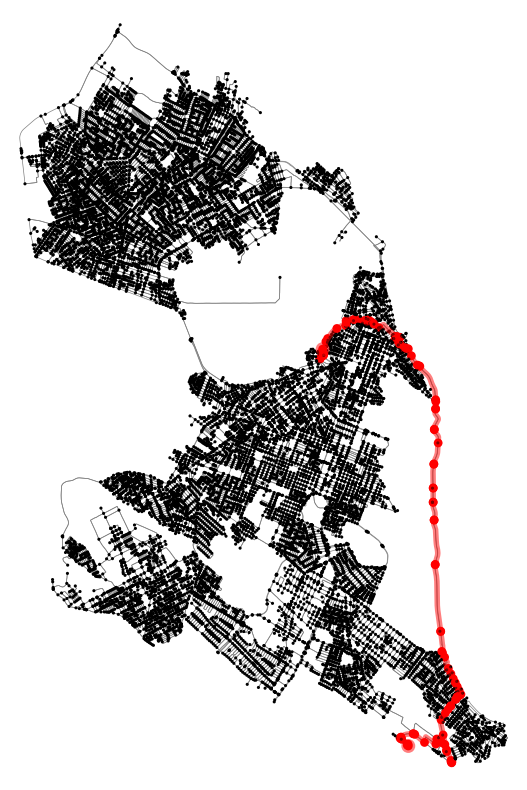

Distância do caminho mais curto de Praia de Ponta Negra para Centro de Turismo: 111.00 metros.


In [21]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Definir as coordenadas dos pontos de interesse em Natal-RN
locations = {
    'Praia de Ponta Negra': (-5.8985, -35.1906),
    'Centro de Turismo': (-5.7866, -35.2119),
    'Catedral de Natal': (-5.7942, -35.2117),
    'Museu Câmara Cascudo': (-5.7947, -35.2111),
    'Parque das Dunas': (-5.8221, -35.2057),
    'Fortaleza dos Reis Magos': (-5.7989, -35.2073),
    'Praia do Forte': (-5.7960, -35.2046),
    'Shopping Midway Mall': (-5.8192, -35.2025),
    'Teatro Alberto Maranhão': (-5.7972, -35.2091),
    'Arena das Dunas': (-5.8199, -35.2115)
}

# Baixar o grafo de Natal (rede de ruas)
place_name = "Natal, Rio Grande do Norte, Brazil"
graph = ox.graph_from_place(place_name, network_type='drive')

# Obter os nós mais próximos de cada ponto de interesse
nodes = {name: ox.distance.nearest_nodes(graph, X=lon, Y=lat) for name, (lat, lon) in locations.items()}

# Função para calcular o caminho mais curto entre dois pontos usando o algoritmo de Dijkstra
def dijkstra(graph, start_node, end_node):
    length, path = nx.single_source_dijkstra(graph, start_node, target=end_node)
    return length, path

# Testar o cálculo do caminho mais curto para o primeiro par de pontos de interesse
start_name, start_node = list(nodes.items())[0]  # 'Praia de Ponta Negra'
end_name, end_node = list(nodes.items())[1]    # 'Centro de Turismo'

# Calcular o caminho mais curto usando Dijkstra
length, path = dijkstra(graph, start_node, end_node)

# Visualizar o grafo e o caminho mais curto no mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Definir os nós destacados
highlighted_nodes = set(path)

# Plotar o grafo com o fundo preto, ruas cinzas e nós destacados
ox.plot_graph(
    graph,
    node_color=["red" if node in highlighted_nodes else "black" for node in graph.nodes()],
    node_size=[40 if node in highlighted_nodes else 5 for node in graph.nodes()],
    edge_color="gray",
    edge_linewidth=0.5,
    bgcolor="black",
    show=False,  # Não queremos exibir o grafo duas vezes
    ax=ax
)

# Plotar o caminho calculado em vermelho com largura maior
path_edges = list(zip(path[:-1], path[1:]))
ox.plot_graph_routes(graph, [path], route_linewidth=6, route_color='red', ax=ax)

# Exibir a distância calculada
print(f"Distância do caminho mais curto de {start_name} para {end_name}: {length:.2f} metros.")
